# Populations and models

## Setup the notebook

In [1]:
from scipy import stats
from opynuni.stats import adt, probmodels
from opynuni.pandasloader import PandasLoader
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pdloader = PandasLoader()

## Continuous models

### Normal distributions

Normal distributions are indexed by two parameters: the mean $\mu$ and variance $\sigma^{2}$.
If $X$ is modelled by the normal distribution, then it is written $X \sim N(\mu, \sigma^{2})$.
The mean, median, and mode of a normal distribution are equal.
A normal distribution is symmetric with a single mode at the mean $\mu$.
Changing the mean $\mu$ will shift the position of the mode left or right (along the x-axis), whilst changing $\sigma^{2}$ will narrow or widen the spread of the distribution.
A special type of normal distribution is the standard normal distribution, $N(0, 1)$.

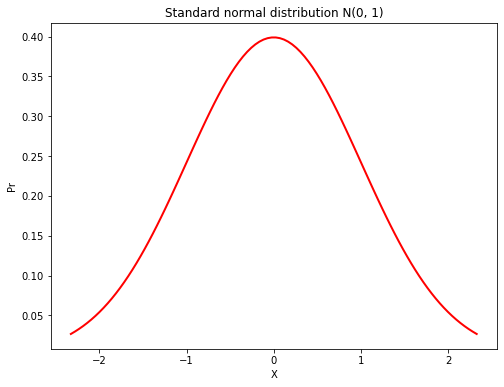

In [3]:
# initialise and plot model
probmodels.plot_cts(stats.norm(), title="Standard normal distribution N(0, 1)")

#### Example: Size of Etruscan skulls

Data on the maximum skull breadths of 84 Etruscan males has been provided by an anthropometric study.
Is a normal distribution a plausible model for the variation in skull breadths of Etruscan males?

In [4]:
# get data
skulls = pdloader.get('skulls')
etruscans = skulls['Etruscans']

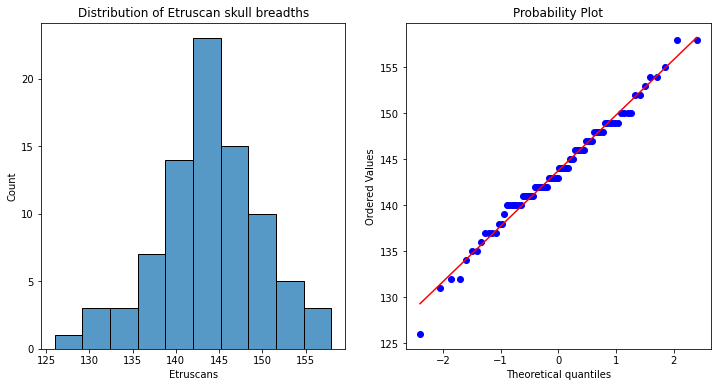

In [5]:
# plot distribution, prob plt
f, axs = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(x=etruscans, bins=10, ax=axs[0])
stats.probplot(x=etruscans, plot=axs[1])
axs[0].set(title="Distribution of Etruscan skull breadths")
plt.show()

In [6]:
# possible normal model
adt.NormRepr(etruscans.mean(), etruscans.var())

N(mean=143.7738,var=35.647)

The histogram shows the data to be unimodal and approximately symmetric, which is consistent with data distributed normally.
The probability plot shows the points lies roughly on a straight line.
Neither plot suggests that a normal model is implausible for the distribution of maximum Etruscan skull breadths, so it is possible that the mean skull breadth of Etruscan skulls can be modelled approximately $N(143.8, 35.6)$.

### Exponential distribution

Exponential distributions are indexed by a single parameter: the rate $\lambda > 0$.
If $X$ is modelled by an exponential distribution, then it is written $X \sim M(\lambda)$.
The mean and standard deviation of an exponential distribution are equal, and are related to the rate paramter, such that:

$$
E(X) = S(X) = \frac{1}{\lambda}.
$$

The p.d.f. is very right-skew and has a single maximum at $x=0$.

It provides a suitable model for the time intervals between successive events in continuous time (the *waiting time*).

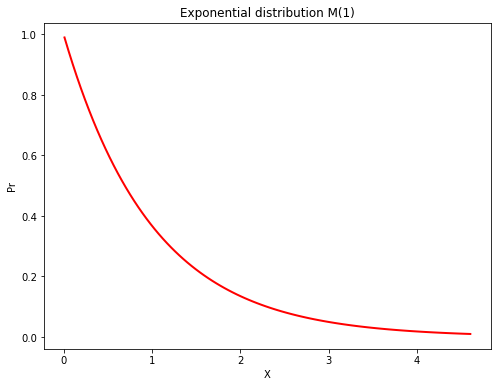

In [7]:
# initialise and plot model
probmodels.plot_cts(stats.expon(), title="Exponential distribution M(1)")

#### Example: Waiting time between goals

Data on the waiting time between goals scored (*assuming the games were played in serial*) has been provided.
It has been suggested that data can be modelled using an exponential model.
Is an exponential model plausible for the waiting time between goals scored?

In [8]:
# get data
goals = pdloader.get('waiting_times_between_goals')
wt = goals["waiting_time"]

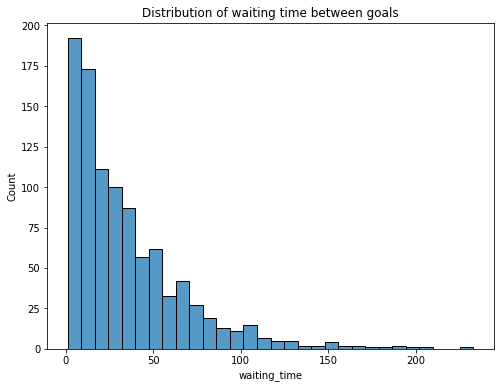

In [9]:
# plot data
f, ax = plt.subplots(figsize=(8, 6))
sns.histplot(x=wt)
ax.set(title="Distribution of waiting time between goals")
plt.show()

In [10]:
# print parameters of sample and model
print(f"mean={wt.mean():.3f}, std={wt.std():.3f}, r={1/wt.mean():.3f}")

mean=34.957, std=33.414, r=0.029


The histogram shows the data has a single mode at $x=0$ and is right-skew.
The sample mean and standard deviation are also quite close.
The distribution seems consistent with what we would expect if the waiting time between goals could be modelled by an exponential model.
This suggests that the waiting time between goals in a football game can be modelled approximately $M(0.029)$.

### Continuous uniform

Countinuous uniform distributions are indexed by two parameters: the minimum and maximum values, $a, b$.
If $X$ is modelled by a continuous uniform distribution, then it is written as $X \sim U(a, b)$.
All values of $X$ in the interval $[a, b]$ are equally likely.
The p.d.f. of U(a, b) is simply a horizontal line at $y=(b-a)^{-1}$.
A special type of continuous uniformation is the **standard uniform distribution** $U(0,1)$.

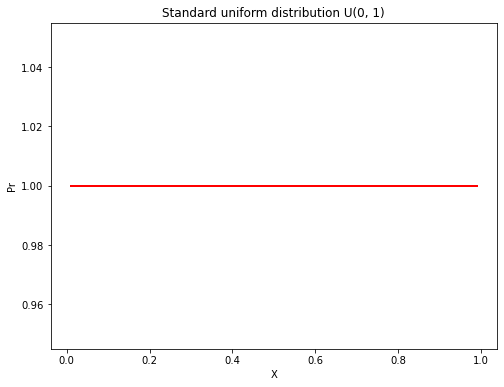

In [11]:
probmodels.plot_cts(stats.uniform(), "Standard uniform distribution U(0, 1)")

## Discrete models

### Discrete continuous distribution

The discrete uniform distribution is indexed by one parameter: $n$, the number of values a random variable can take.
Each possibile outcome has an equal chance of occuring.

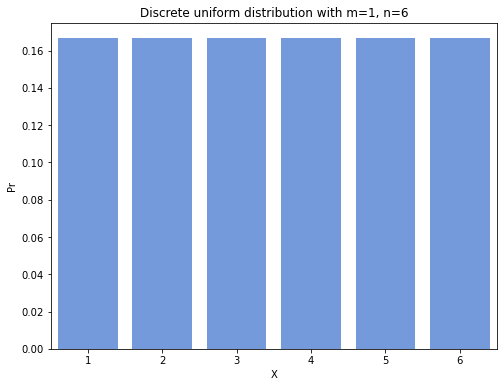

In [12]:
# example, rolling a die
probmodels.plot_discrete(
    stats.randint(1, 7), "Discrete uniform distribution with m=1, n=6"
)

### Binomial distribution

The family of binomail distributions is indexed by two parameters $n$ and $p$, where $n$ is the sample size and $p$ is the success probability.
If a random variable $X$ has a binomial distribution with parameters $n$ and $p$, this is written $X \sim B(n,p)$.
A special type of binomial distribution is the Bernoulli distribution, which provides the model for a single **Bernoulli trial**, so $B(1, p)$ or $\text{Bernoulli}(p)$.

A binomial distribution has a single mode at the mean.
It is:
 - right-skew when $p < 0.5$
 - left-skew when $p > 0.5$
 - symmetric when $p = 0.5$.

The binomial distribution, $B(n, p)$, provides a probability model for the total number of successes in a sequence of $n$ independent Bernoulli trials, in which the probability of success in a single trial is $p$.
A binomial model is very commonly used to represent data on the number of individuals with a particular attribute in a sample of a given size.

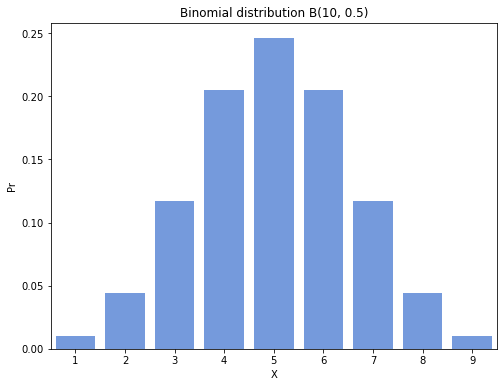

In [13]:
# plot example
probmodels.plot_discrete(
    stats.binom(10, 0.5), "Binomial distribution B(10, 0.5)"
)

#### Example: Severity of asthma cases

One way to classify the severity of cases of asthma admitted to hospital is by their length of stay.
For example, a case might be regarded as severe if one or more days in hospital are required.
Of the 1762 admissions for asthma at the Nottingham hospital, 500 were admitted for less than a day.

Model the scenario for every 100 patients being admitted for cases of asthma.

In [14]:
# set parameters
n, p = 100, 500/1762

n=100, p=0.284, mean=28.377, var=20.324


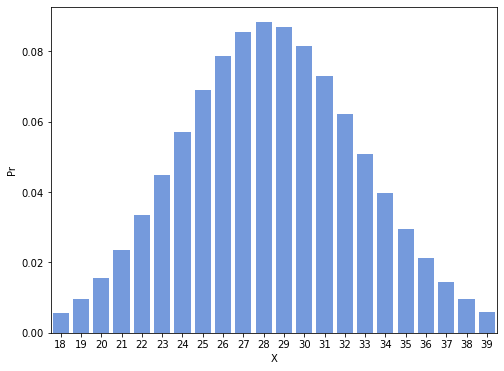

In [15]:
# initialise and plot model
model = stats.binom(n, p)
mean, var = model.mean(), model.var()
print(f"n={n}, p={p:.3f}, mean={mean:.3f}, var={var:.3f}")
probmodels.plot_discrete(model)

### Poisson distribution

The family of Poisson distributions is indexed by a single parameter, the mean $\mu$.
If a random variable X has the Poisson distribution with mean $\mu$, this is written $X \sim \text{Poisson}(\mu)$.
The variance of a Poisson distribution is equal to its mean.
The range of a Poisson distribution is $\{0, 1, 2, \ldots\}$.
It has no upper boundary.

The Poisson model is often used to represent counts of independently occurring events.

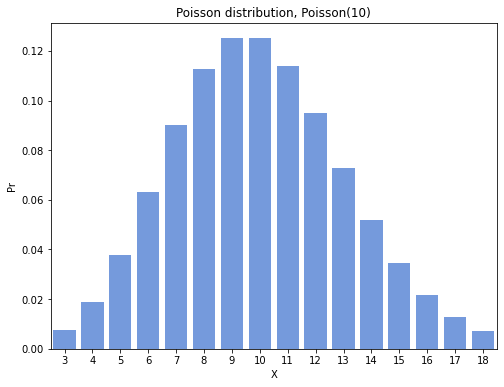

In [18]:
probmodels.plot_discrete(stats.poisson(10), "Poisson distribution, Poisson(10)")

#### Example: Number of goals in a football game

Data has been provided for the number of goals scored in a English Premier League season.
It has been suggested that it can be modelled by a Poisson distribution.
Check if this the case.

In [21]:
# get data and plot
games = pdloader.get('number_of_goals_per_game')
goals = games["goals"]

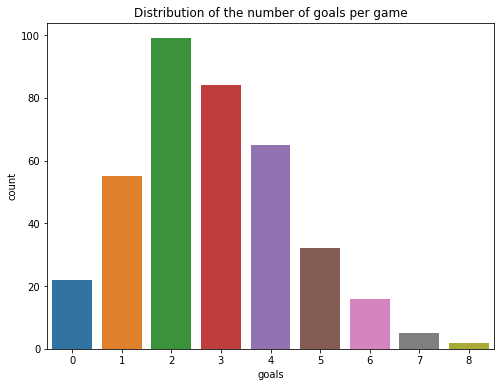

In [22]:
f, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x=goals)
ax.set(title="Distribution of the number of goals per game")
plt.show()

In [23]:
# get parameters
print(f"mean={goals.mean():.3f}, var={goals.var():.3f}")

mean=2.821, var=2.564


The histogram shows the data has a single mode at $x=2$ and is slightly right-skew.
The sample mean and variance are also quite close.
These are all consistent with what we would expect if the expected number of goals in a football game could be modelled by an Poisson distribution.
It suggests that the number of goals per football game be modelled by approximately $\text{Poisson}(2.821)$.